## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *

### (2) 데이터로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/SeoulBikeData2.csv'
data = pd.read_csv(path)
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d %H:%M:%S')
data.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Visibility,Solar,Rainfall,Snowfall,Seasons,Holiday,FuncDay
0,2017-12-01 00:00:00,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01 01:00:00,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01 02:00:00,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01 03:00:00,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01 04:00:00,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


**변수설명**  

* DateTime : year-month-day hh:mi:ss
* Count : 시간대별 수요량
* Temperature : 온도(섭씨)
* Humidity : 습도(%)
* WindSpeed : 풍속(m/s)
* Visibility : 가시거리(단위: 10m)
* Solar - 태양복사열, MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday / No holiday
* FuncDay - Yes / No (따릉이 운행 여부)


In [3]:
# 데이터 기간은 다음과 같습니다.
data.DateTime.min(), data.DateTime.max()

(Timestamp('2017-12-01 00:00:00'), Timestamp('2018-11-30 23:00:00'))

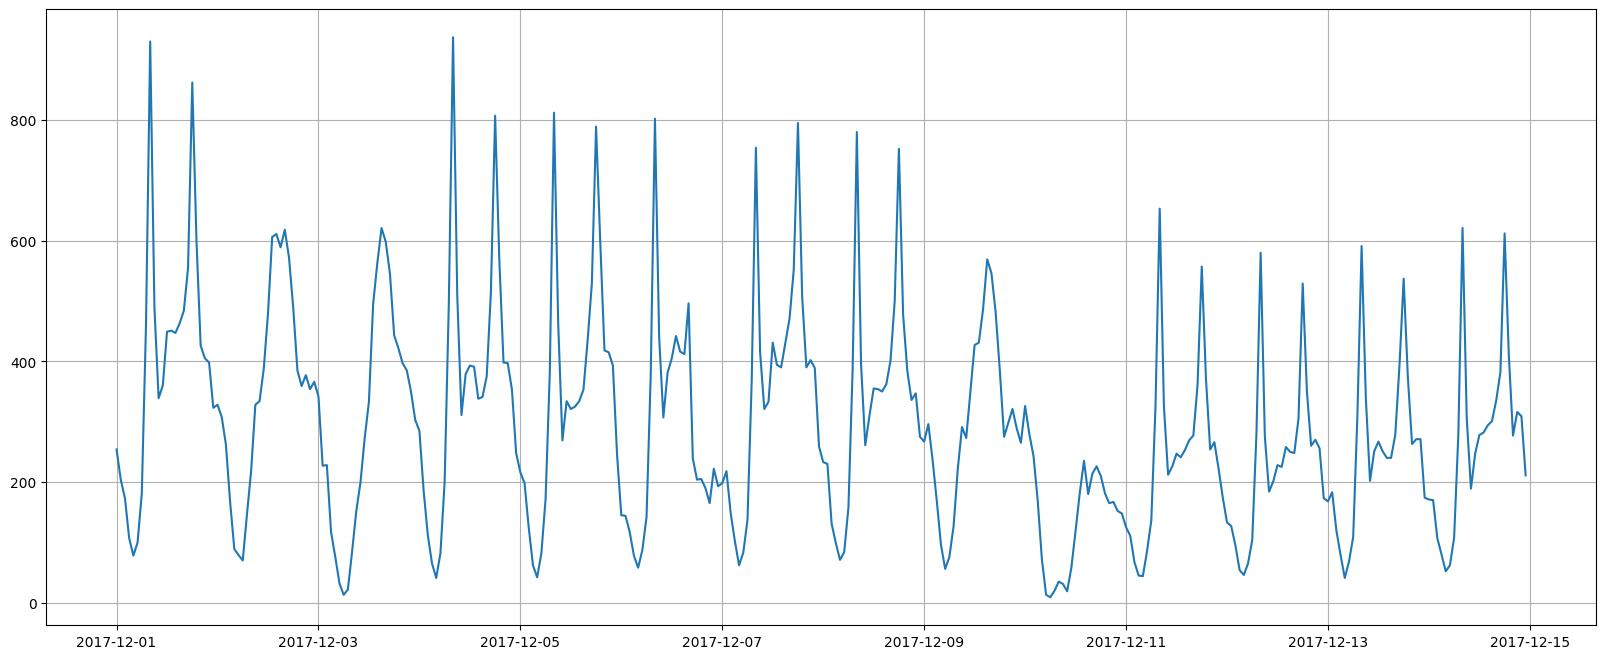

In [4]:
# 14일 동안의 수요량을 살펴 봅시다.
temp = data[:24*14]
plt.figure(figsize = (20,8))
plt.plot('DateTime', 'Count', data = temp)
plt.grid()
plt.show()

## 2.데이터 준비

### (1) y 만들기 
* 2시간 이후의 수요량을 예측해야 합니다.

In [5]:
data['y'] = data['Count'].shift(-2)
data.head()

,DateTime,Count,Temperature,Humidity,WindSpeed,Visibility,Solar,Rainfall,Snowfall,Seasons,Holiday,FuncDay,y
0,2017-12-01 00:00:00,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,173.0
1,2017-12-01 01:00:00,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,107.0
2,2017-12-01 02:00:00,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,78.0
3,2017-12-01 03:00:00,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,100.0
4,2017-12-01 04:00:00,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,181.0


In [6]:
# 2칸을 앞당겼기 때문에 하위 2행의 y값에 NaN이 표시되어 있습니다.
data.tail()

,DateTime,Count,Temperature,Humidity,WindSpeed,Visibility,Solar,Rainfall,Snowfall,Seasons,Holiday,FuncDay,y
8755,2018-11-30 19:00:00,1003,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,694.0
8756,2018-11-30 20:00:00,764,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,712.0
8757,2018-11-30 21:00:00,694,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,584.0
8758,2018-11-30 22:00:00,712,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN
8759,2018-11-30 23:00:00,584,1.9,43,1.3,1909,0.0,0.0,0.0,Autumn,No Holiday,Yes,NaN


In [7]:
# 하위 2행은 삭제합니다.
# 하위 2행 제외하고 다시 붓기
data = data[:-2]

### (2) 데이터 분할1 : x, y 나누기

In [8]:
x = data.drop('y',axis=1)
y = data['y']

In [9]:
y

0        173.0
1        107.0
2         78.0
3        100.0
4        181.0
         ...  
8753    1003.0
8754     764.0
8755     694.0
8756     712.0
8757     584.0
Name: y, Length: 8758, dtype: float64

### (3) feature engineering
* 이 부분은 넘어가셔도 좋습니다.
* 다만 DataTime은 제거합니다.

In [10]:
# 날짜 데이터 제거
x = x.drop('DateTime',axis=1)

In [11]:
x

,Count,Temperature,Humidity,WindSpeed,Visibility,Solar,Rainfall,Snowfall,Seasons,Holiday,FuncDay
0,254,-5.2,37,2.2,2000,0.00,0.0,0.0,Winter,No Holiday,Yes
1,204,-5.5,38,0.8,2000,0.00,0.0,0.0,Winter,No Holiday,Yes
2,173,-6.0,39,1.0,2000,0.00,0.0,0.0,Winter,No Holiday,Yes
3,107,-6.2,40,0.9,2000,0.00,0.0,0.0,Winter,No Holiday,Yes
4,78,-6.0,36,2.3,2000,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8753,1047,6.0,29,2.1,1877,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,1384,4.7,34,1.9,1661,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,1003,4.2,34,2.6,1894,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,764,3.4,37,2.3,2000,0.00,0.0,0.0,Autumn,No Holiday,Yes


### (4) NaN 조치

### (5) 가변수화

In [12]:
x = pd.get_dummies(x,columns=['Holiday','Seasons','FuncDay'],drop_first=True)

In [13]:
x

,Count,Temperature,Humidity,WindSpeed,Visibility,Solar,Rainfall,Snowfall,Holiday_No Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter,FuncDay_Yes
0,254,-5.2,37,2.2,2000,0.00,0.0,0.0,1,0,0,1,1
1,204,-5.5,38,0.8,2000,0.00,0.0,0.0,1,0,0,1,1
2,173,-6.0,39,1.0,2000,0.00,0.0,0.0,1,0,0,1,1
3,107,-6.2,40,0.9,2000,0.00,0.0,0.0,1,0,0,1,1
4,78,-6.0,36,2.3,2000,0.00,0.0,0.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8753,1047,6.0,29,2.1,1877,0.23,0.0,0.0,1,0,0,0,1
8754,1384,4.7,34,1.9,1661,0.00,0.0,0.0,1,0,0,0,1
8755,1003,4.2,34,2.6,1894,0.00,0.0,0.0,1,0,0,0,1
8756,764,3.4,37,2.3,2000,0.00,0.0,0.0,1,0,0,0,1


### (6) 데이터분할2 : train : val

* 시계열 데이터이므로 시간의 흐름에 맞게 분할합시다.
* 뒤에서 30일 : validaiton
* 나머지 : train
* 30일 : 시간단위 데이터이므로 24 * 30
* train_test_split(x, y, test_size = 24 * 30, shuffle = False)
    * shuffle : 데이터를 섞을지, 아니면 있는 그대로 자를지 결정.

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=.3,shuffle=False)

In [15]:
y_train

0        173.0
1        107.0
2         78.0
3        100.0
4        181.0
         ...  
6125    1065.0
6126    1657.0
6127     903.0
6128     639.0
6129     677.0
Name: y, Length: 6130, dtype: float64

### (7) Scaling

## 3.모델링
* 배운 알고리즘을 적용하여 모델링을 수행하고 성능을 비교합니다.

In [16]:
import Util_for_sklearn_ksw as ufs

### (1) 선형회귀

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lst ,df = ufs.forward_stepwise_linear(x_train,y_train)

In [19]:
m_line = LinearRegression()
m_line.fit(x_train[lst],y_train)

LinearRegression()

In [20]:
pred_line = m_line.predict(x_val[lst])

In [21]:
ufs.Regressor_report(y_val,pred_line)

MAE :  291.39807476908425
MAPE :  7.876520157745555e+16
RMSE :  421.75117027271614


### (2) KNN

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [24]:
m_knn = KNeighborsRegressor()

param = {'n_neighbors':range(10,101,10),'metric' : ['manhattan','euclidean']}

m_knn_g = GridSearchCV(m_knn, param, cv=5)



In [25]:
m_knn_g.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(10, 101, 10)})

In [26]:
df = pd.DataFrame(m_knn_g.cv_results_)

In [27]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021092,0.002941,0.036712,0.007052,manhattan,10,"{'metric': 'manhattan', 'n_neighbors': 10}",0.052320,0.331280,0.535624,0.595166,0.351514,0.373181,0.190180,6
1,0.019472,0.003402,0.033612,0.005560,manhattan,20,"{'metric': 'manhattan', 'n_neighbors': 20}",0.082913,0.381668,0.559526,0.576089,0.368014,0.393642,0.177852,2
2,0.016472,0.000470,0.037724,0.005199,manhattan,30,"{'metric': 'manhattan', 'n_neighbors': 30}",0.081671,0.408379,0.570076,0.554341,0.357213,0.394336,0.176534,1
3,0.016580,0.000439,0.045720,0.007946,manhattan,40,"{'metric': 'manhattan', 'n_neighbors': 40}",0.079170,0.407650,0.577922,0.537140,0.360980,0.392572,0.175898,3
4,0.017078,0.001921,0.045781,0.008264,manhattan,50,"{'metric': 'manhattan', 'n_neighbors': 50}",0.075821,0.403308,0.577121,0.519659,0.341962,0.383574,0.174821,4
5,0.016275,0.001235,0.048906,0.007006,manhattan,60,"{'metric': 'manhattan', 'n_neighbors': 60}",0.076575,0.396608,0.578339,0.505095,0.332297,0.377783,0.172963,5
6,0.015771,0.000151,0.051247,0.006465,manhattan,70,"{'metric': 'manhattan', 'n_neighbors': 70}",0.077668,0.389100,0.575703,0.490639,0.323535,0.371329,0.170200,7
7,0.016016,0.000405,0.056563,0.008408,manhattan,80,"{'metric': 'manhattan', 'n_neighbors': 80}",0.075917,0.388022,0.575971,0.476849,0.316311,0.366614,0.169396,8
8,0.015737,0.000467,0.060010,0.009751,manhattan,90,"{'metric': 'manhattan', 'n_neighbors': 90}",0.071437,0.382466,0.573095,0.464614,0.304162,0.359155,0.169258,10
9,0.018124,0.003290,0.079897,0.026214,manhattan,100,"{'metric': 'manhattan', 'n_neighbors': 100}",0.067633,0.377259,0.570476,0.453828,0.292119,0.352263,0.169227,12


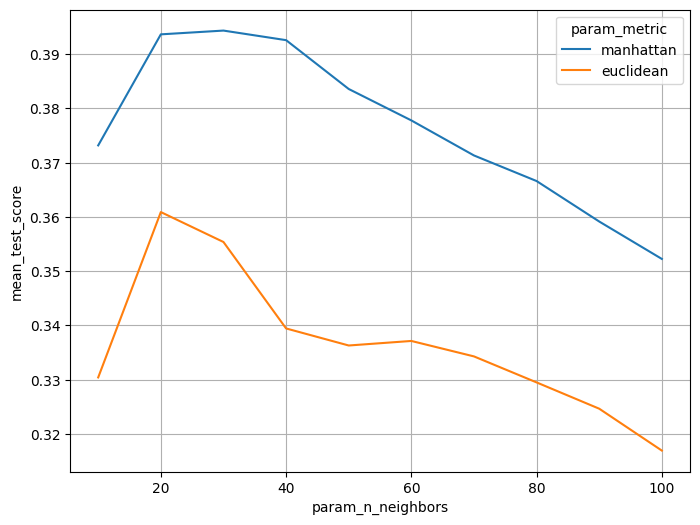

In [28]:
ufs.mean_test_score_lineplot(df=df,x='param_n_neighbors',hue='param_metric')

In [29]:
pred_knn = m_knn_g.predict(x_val_s)

In [30]:
ufs.Regressor_report(y_val,pred_knn)

MAE :  292.13697361745307
MAPE :  6.169531626516966e+16
RMSE :  415.8678572781848


### (3) Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

m_dt = DecisionTreeRegressor()

param_dt = {'max_depth' : range(5,10) , 'min_samples_leaf' : range(50,100,10)}

m_dt_g = GridSearchCV(m_dt,param_dt,cv=5)

In [32]:
m_dt_g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(50, 100, 10)})

In [34]:
df = pd.DataFrame(m_dt_g.cv_results_)
df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015751,0.003244,0.002215,0.000317,5,50,"{'max_depth': 5, 'min_samples_leaf': 50}",0.130285,0.141246,0.532112,0.636399,0.358715,0.359751,0.203294,6
1,0.012747,0.000767,0.002337,0.000765,5,60,"{'max_depth': 5, 'min_samples_leaf': 60}",0.130285,0.136195,0.547328,0.630377,0.347799,0.358397,0.205518,7
2,0.011814,0.000363,0.001236,0.000397,5,70,"{'max_depth': 5, 'min_samples_leaf': 70}",0.133496,0.104622,0.527907,0.631230,0.360422,0.351535,0.208769,20
3,0.013249,0.003191,0.001925,0.000652,5,80,"{'max_depth': 5, 'min_samples_leaf': 80}",0.132021,0.116600,0.527498,0.621381,0.363333,0.352167,0.203616,16
4,0.011626,0.000855,0.001836,0.000564,5,90,"{'max_depth': 5, 'min_samples_leaf': 90}",0.178286,0.129364,0.533606,0.621468,0.348293,0.362203,0.192266,4


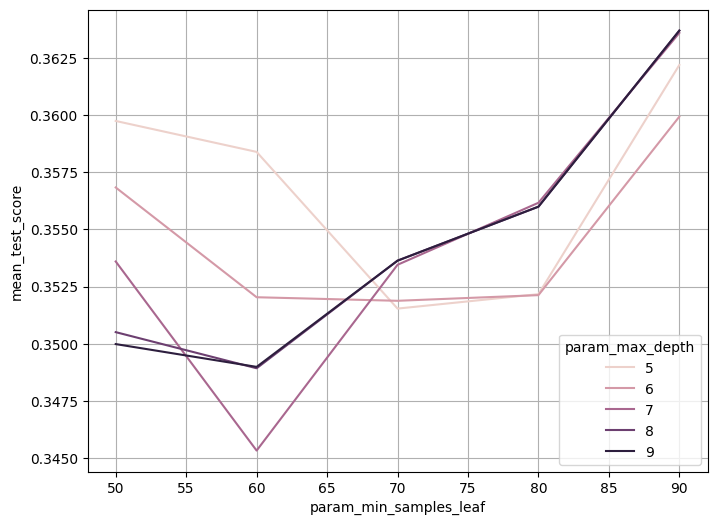

In [35]:


ufs.mean_test_score_lineplot(df,'param_min_samples_leaf','param_max_depth')

In [36]:
m_dt_g.best_params_

{'max_depth': 8, 'min_samples_leaf': 90}

### (4) SVM
* svm은 모델링 시간이 오래 걸립니다.

In [38]:
from sklearn.svm import SVR

In [43]:
m_svr = SVR()

param_svr = {'gamma':range(1,6) , 'C':range(1,6)}

m_svr_g = GridSearchCV(m_svr,param_svr,cv=5,verbose=3)

In [44]:
m_svr_g.fit(x_train_s,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=1, gamma=1;, score=-0.318 total time=   2.1s
[CV 2/5] END ......................C=1, gamma=1;, score=0.019 total time=   2.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.123 total time=   2.4s
[CV 4/5] END .....................C=1, gamma=1;, score=-0.346 total time=   2.1s
[CV 5/5] END .....................C=1, gamma=1;, score=-0.166 total time=   1.9s
[CV 1/5] END .....................C=1, gamma=2;, score=-0.845 total time=   2.1s
[CV 2/5] END .....................C=1, gamma=2;, score=-0.128 total time=   2.0s
[CV 3/5] END ......................C=1, gamma=2;, score=0.080 total time=   2.0s
[CV 4/5] END .....................C=1, gamma=2;, score=-0.412 total time=   2.0s
[CV 5/5] END .....................C=1, gamma=2;, score=-0.322 total time=   2.0s
[CV 1/5] END .....................C=1, gamma=3;, score=-1.145 total time=   2.1s
[CV 2/5] END .....................C=1, gamma=3;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': range(1, 6), 'gamma': range(1, 6)}, verbose=3)

In [46]:
df = pd.DataFrame(m_svr_g.cv_results_)

df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.506220,0.099595,0.704762,0.057422,1,1,"{'C': 1, 'gamma': 1}",-0.317511,0.018629,0.123419,-0.345733,-0.166470,-0.137533,0.183880,15
1,1.410762,0.041164,0.700777,0.033636,1,2,"{'C': 1, 'gamma': 2}",-0.845479,-0.127745,0.080248,-0.411994,-0.321926,-0.325379,0.310358,20
2,1.437971,0.049006,0.720606,0.061213,1,3,"{'C': 1, 'gamma': 3}",-1.145282,-0.234818,0.046724,-0.474816,-0.410081,-0.443655,0.394579,23
3,1.445629,0.119061,0.693813,0.057274,1,4,"{'C': 1, 'gamma': 4}",-1.376351,-0.324204,0.016496,-0.536011,-0.479601,-0.539934,0.460305,24
4,1.378858,0.051241,0.697336,0.047966,1,5,"{'C': 1, 'gamma': 5}",-1.557815,-0.407598,-0.012421,-0.587854,-0.534687,-0.620075,0.510309,25


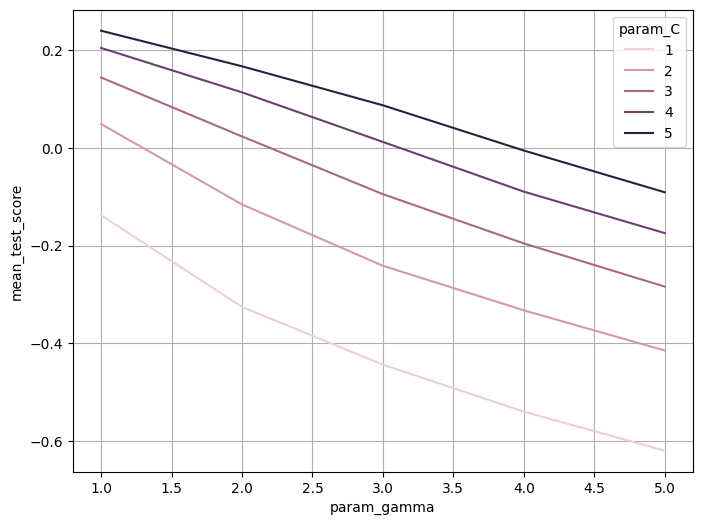

In [48]:
ufs.mean_test_score_lineplot(df,'param_gamma','param_C')

In [57]:
m_svr_g.best_params_

{'C': 5, 'gamma': 1}

In [60]:
pred_svr = m_svr_g.predict(x_val_s)

In [61]:
ufs.Regressor_report(y_val,pred_svr)

MAE :  421.4361108984596
MAPE :  1.930266299924082e+17
RMSE :  559.561920512533


### (5) Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
m_rf = RandomForestRegressor()

param_rf = {'n_estimators':range(50,100,10),'max_depth' : range(5,11),'min_samples_leaf' : range(50,101,10)}

m_rf_g = GridSearchCV(m_rf,param_rf,cv=5,verbose=3)


In [53]:
m_rf_g.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END max_depth=5, min_samples_leaf=50, n_estimators=50;, score=0.239 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=50, n_estimators=50;, score=0.439 total time=   0.3s
[CV 3/5] END max_depth=5, min_samples_leaf=50, n_estimators=50;, score=0.595 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_leaf=50, n_estimators=50;, score=0.670 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_leaf=50, n_estimators=50;, score=0.377 total time=   0.3s
[CV 1/5] END max_depth=5, min_samples_leaf=50, n_estimators=60;, score=0.252 total time=   0.4s
[CV 2/5] END max_depth=5, min_samples_leaf=50, n_estimators=60;, score=0.409 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=50, n_estimators=60;, score=0.584 total time=   0.4s
[CV 4/5] END max_depth=5, min_samples_leaf=50, n_estimators=60;, score=0.672 total time=   0.4s
[CV 5/5] END max_depth=5, min_samples_leaf=50, n_estimators=60;, score=0.

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(5, 11),
                         'min_samples_leaf': range(50, 101, 10),
                         'n_estimators': range(50, 100, 10)},
             verbose=3)

In [54]:
df = pd.DataFrame(m_rf_g.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.397572,0.021069,0.008008,0.000643,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'n_es...",0.238867,0.439428,0.594601,0.669564,0.377111,0.463914,0.153722,1
1,0.523888,0.062328,0.012219,0.003879,5,50,60,"{'max_depth': 5, 'min_samples_leaf': 50, 'n_es...",0.251747,0.408578,0.583693,0.671507,0.343847,0.451874,0.154409,59
2,0.596657,0.025178,0.010274,0.000967,5,50,70,"{'max_depth': 5, 'min_samples_leaf': 50, 'n_es...",0.258587,0.412371,0.585877,0.670658,0.357731,0.457045,0.150647,31
3,0.651421,0.048160,0.011298,0.000934,5,50,80,"{'max_depth': 5, 'min_samples_leaf': 50, 'n_es...",0.241620,0.402565,0.581154,0.665929,0.384070,0.455068,0.150810,41
4,0.728272,0.035435,0.011723,0.001432,5,50,90,"{'max_depth': 5, 'min_samples_leaf': 50, 'n_es...",0.262198,0.392248,0.581934,0.668031,0.360914,0.453065,0.149290,51


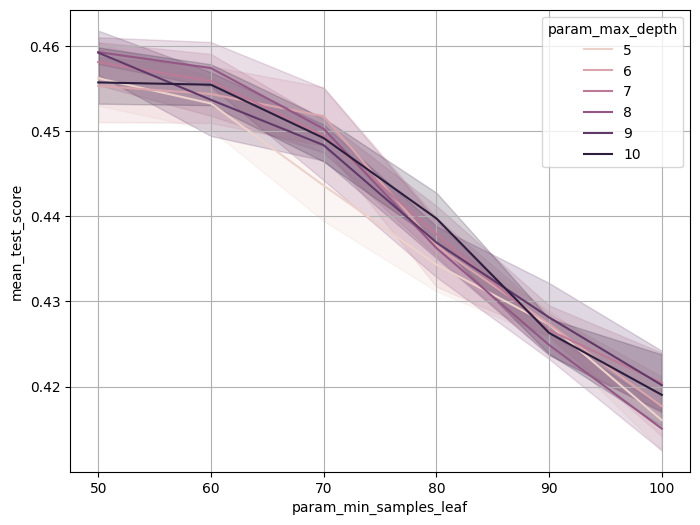

In [55]:
ufs.mean_test_score_lineplot(df,'param_min_samples_leaf','param_max_depth')

In [56]:
m_rf_g.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'n_estimators': 50}

In [62]:
pred_rf = m_rf_g.predict(x_val)

In [63]:
ufs.Regressor_report(y_val,pred_rf)

MAE :  254.75729512394625
MAPE :  3.841635914475699e+16
RMSE :  396.83349109237736


### (6) XGB

### (7) SARIMAX

### (8) Deep Learning
* 딥러닝 모델링은 이번 머신러닝 과정 안에 포함되지 않습니다. 추후에 배우신 다음에 시도해보세요.
* 시도해볼 만한 방식
    * DNN
    * CNN(Conv1d)
    * RNN(LSTM)

### (9) 그외 추가 알고리즘